# Model Analysis
This notebook visualizes training loss, accuracy, and confusion matrix.

In [19]:

# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


## Load Model History (Optional)
If you manually saved the training history, you could load it here.

In [20]:
# Load training history
import pickle

with open('../models/history.pkl', 'rb') as f:
    history = pickle.load(f)
    print(history.keys())

# Plot training & validation accuracy values



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


## Plot Training History

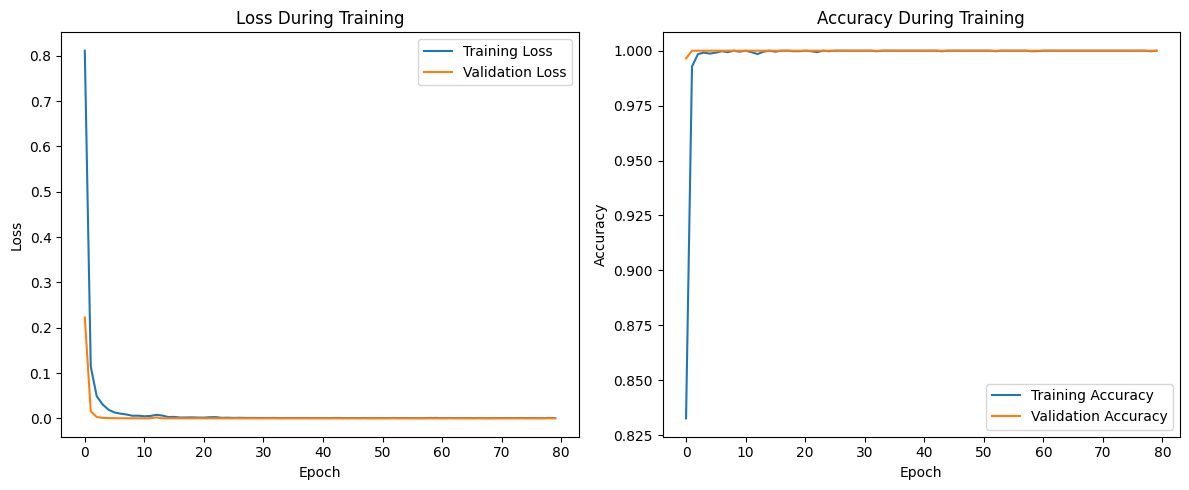

In [21]:

def plot_training_curves(history):
    if not history:
        print("No training history found.")
        return

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Loss During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
plot_training_curves(history)


## Evaluate Final Model

In [22]:

# Load model
model = tf.keras.models.load_model('../models/letter_model.h5')

# Load dataset
master_df = pd.read_csv('../data/processed/training_data_letters_MASTER.csv')
X = master_df.drop(columns=['label', 'session_id']).values
y = master_df['label'].values

# Reload scaler
import joblib
scaler = joblib.load('../models/feature_scaler.pkl')
X = scaler.transform(X)

# Evaluate
loss, accuracy = model.evaluate(X, y, verbose=1)
print(f"\nFinal Evaluation on Full Dataset:\n - Loss: {loss:.4f}\n - Accuracy: {accuracy:.4f}")


179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 3.4994e-06

Final Evaluation on Full Dataset:
 - Loss: 0.0000
 - Accuracy: 1.0000


## Confusion Matrix

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Figure size 1200x1000 with 0 Axes>

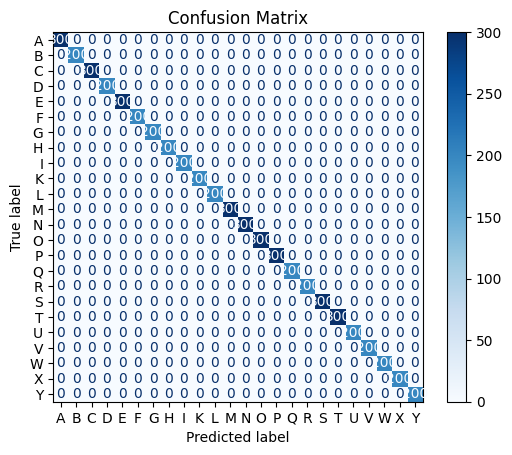

In [23]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict classes
y_pred = model.predict(X)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(y, y_pred_classes)
labels = [letter.upper() for letter in 'abcdefghiklmnopqrstuvwxy']

plt.figure(figsize=(12, 10))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


## Summary

In [24]:

print("\nModel analysis complete: Loss/Accuracy plots, Final evaluation, and Confusion Matrix displayed.")



Model analysis complete: Loss/Accuracy plots, Final evaluation, and Confusion Matrix displayed.
